# seaborm 作业   韩佩佳

# 数据可视化作业题目

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [32]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0.5, 1.0, 'The numbers of passengers in each year')

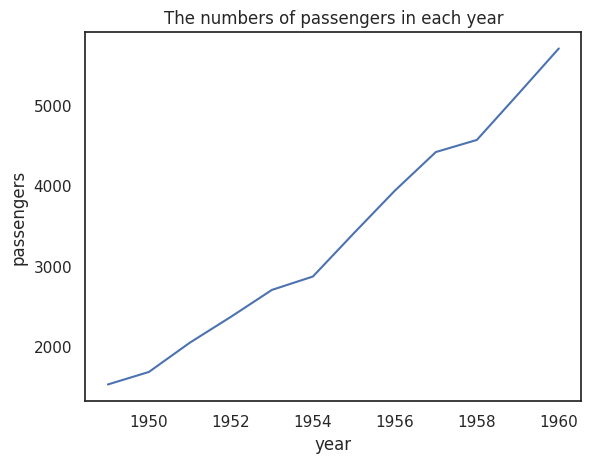

In [34]:
data_totals = data.groupby("year")["passengers"].sum().reset_index()
sns.set_style('white')
sns.lineplot(x='year', y='passengers', data=data_totals).set_title('The numbers of passengers in each year')

Text(0.5, 1.0, 'The numbers of passengers in each month')

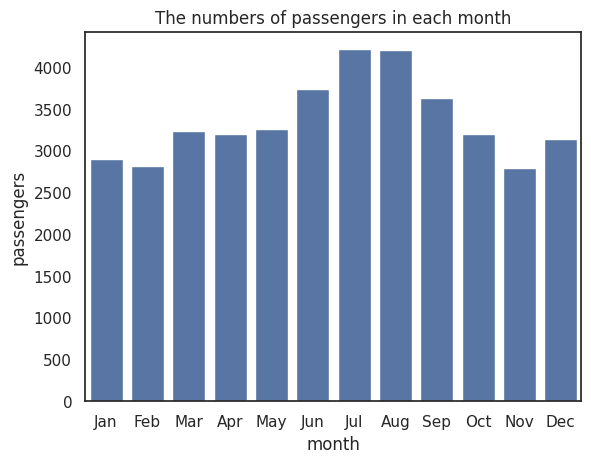

In [35]:
sns.barplot(x='month', y='passengers', estimator='sum', data=data, errorbar=None).set_title('The numbers of passengers in each month')

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [36]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/tmp/ipykernel_181/3863158319.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, indexs)


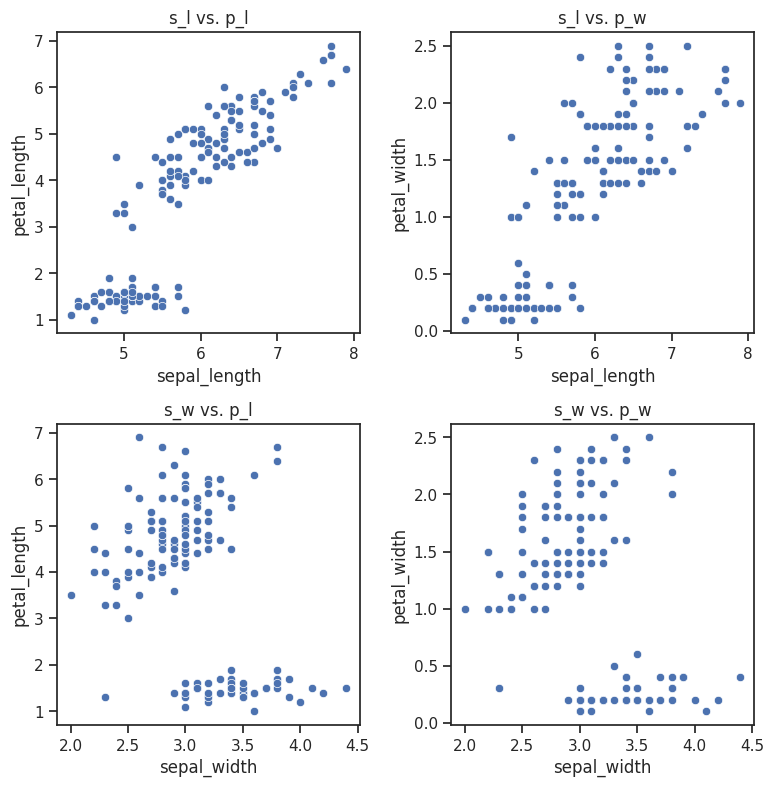

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
data = sns.load_dataset("iris")

# 定义绘图函数
def PlotScatter(X, Y, Title, indexs):
    # 风格管理
    sns.set_style("ticks")
    sns.set_context("notebook")
    
    # 绘图
    plt.subplot(2, 2, indexs)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    sns.scatterplot(
        data=data, x=X, y=Y,
        ).set_title(Title)

# 设置图像大小
fig, ax = plt.subplots(figsize=(9, 9))

# 去掉坐标轴
plt.axis('off')

# 定义变量组合和标题
result = [("sepal_length", "petal_length", "s_l vs. p_l"),
                ("sepal_length", "petal_width", "s_l vs. p_w"),
                ("sepal_width", "petal_length", "s_w vs. p_l"),
                ("sepal_width", "petal_width", "s_w vs. p_w")]

# 使用循环绘制所有的散点图
for i, (x, y, title) in enumerate(result, start=1):
    PlotScatter(x, y, title, i)

# 显示图形
plt.show()

/tmp/ipykernel_181/2777219236.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, indexs)


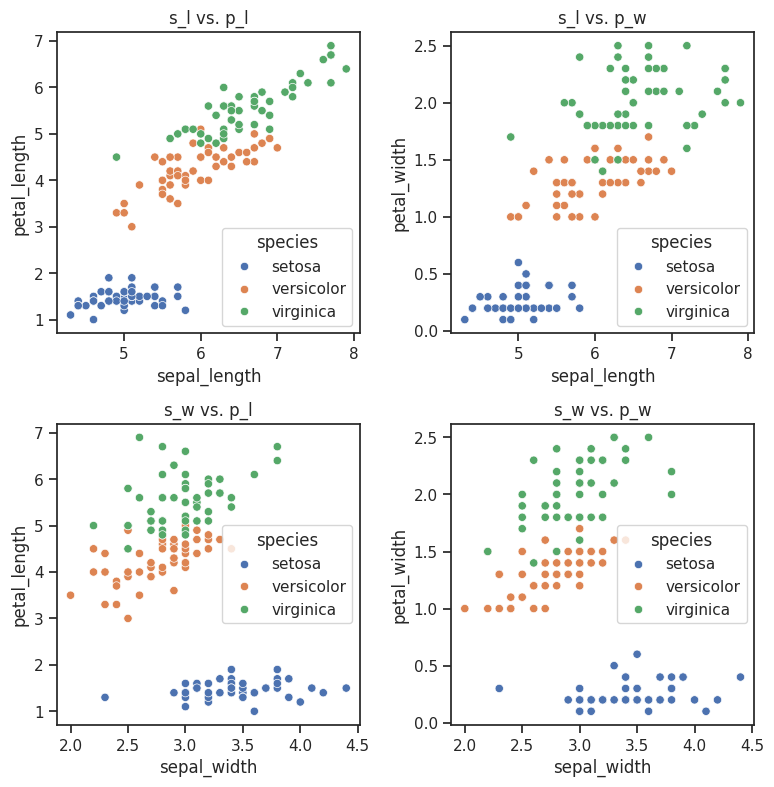

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
data = sns.load_dataset("iris")

# 定义绘图函数
def PlotScatter(X, Y, Title, indexs):
    # 风格管理
    sns.set_style("ticks")
    sns.set_context("notebook")
    
    # 绘图
    plt.subplot(2, 2, indexs)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    sns.scatterplot(
        data=data, x=X, y=Y, hue='species'
        ).set_title(Title)

# 设置图像大小
fig, ax = plt.subplots(figsize=(9, 9))

# 去掉坐标轴
plt.axis('off')

# 定义变量组合和标题
combinations = [("sepal_length", "petal_length", "s_l vs. p_l"),
                ("sepal_length", "petal_width", "s_l vs. p_w"),
                ("sepal_width", "petal_length", "s_w vs. p_l"),
                ("sepal_width", "petal_width", "s_w vs. p_w")]

# 使用循环绘制所有的散点图
for i, (x, y, title) in enumerate(combinations, start=1):
    PlotScatter(x, y, title, i)

# 显示图形
plt.show()

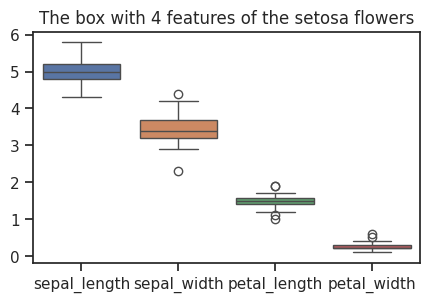

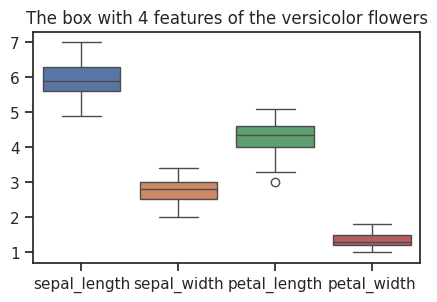

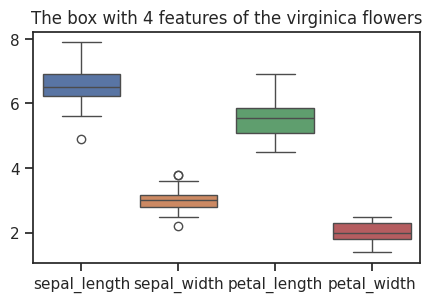

In [50]:
species = ['setosa', 'versicolor', 'virginica']
data_species = []
for i in species:
    j = data.groupby("species").get_group(i)
    data_species.append(j)
index = 0
for i in data_species:
    # 设置图像大小
    plt.figure(figsize=(5, 3))
    ax = sns.boxplot(data=i)
    ax.set_title('The box with 4 features of the %s flowers'%species[index])
    index += 1
    plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [54]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1

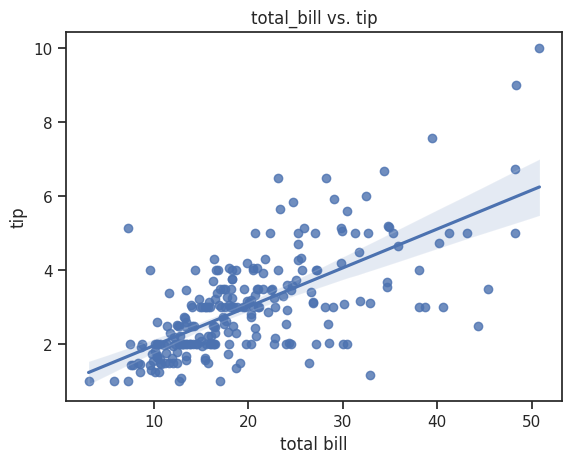

In [56]:
# 风格管理
sns.set_style("ticks")
sns.set_context("notebook")

def plot_reg(x, y, data, x_label, y_label, title):
    ## 绘图
    sns.regplot(x=x, y=y, data=data).set_title(title)

    plt.xlabel(x_label) # 设置横坐标标题
    plt.ylabel(y_label) # 设置纵坐标标题

    plt.show()

# 使用函数绘图
plot_reg("total_bill", "tip", data, "total bill", "tip", "total_bill vs. tip")

### 2

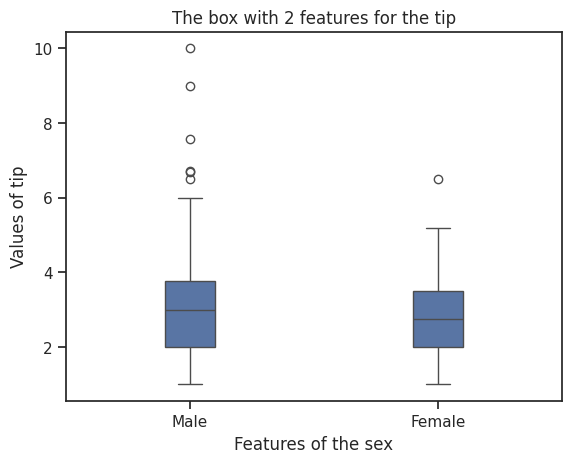

In [57]:
# 风格管理
sns.set_style("ticks")
sns.set_context("notebook")

def plot_box(data, x, y, width, x_label, y_label, title):
    ## 绘图
    sns.boxplot(data=data, x=x, y=y, width=width).set_title(title)

    plt.xlabel(x_label) # 设置横坐标标题
    plt.ylabel(y_label) # 设置纵坐标标题

    plt.show()

# 使用函数绘图
plot_box(data, "sex", "tip", 0.2, "Features of the sex", "Values of tip", "The box with 2 features for the tip")

### 3

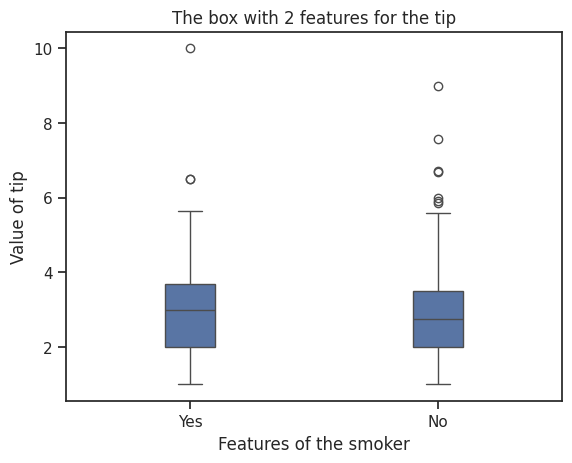

In [67]:
plot_box(data, "smoker", "tip", 0.2, "Features of the smoker", "Value of tip", "The box with 2 features for the tip")

### 4

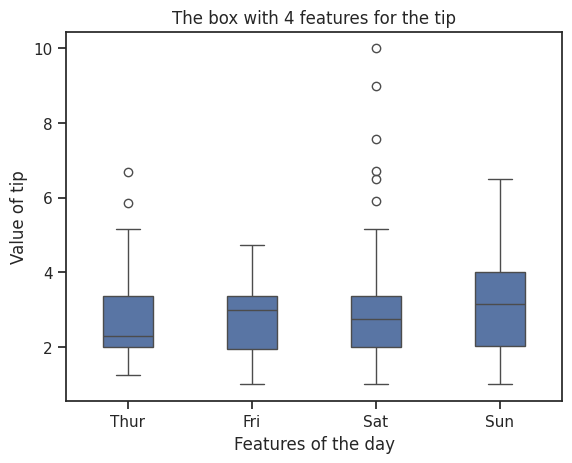

In [68]:
plot_box(data, "day", "tip", 0.4, "Features of the day", "Value of tip", "The box with 4 features for the tip")

### 5

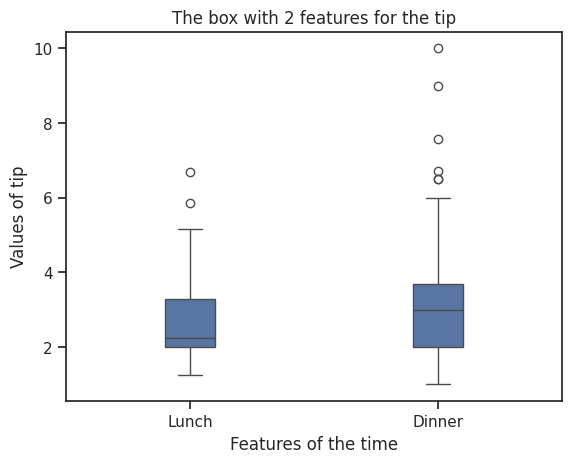

In [69]:
plot_box(data, "time", "tip", 0.2, "Features of the time", "Values of tip", "The box with 2 features for the tip")

### 6

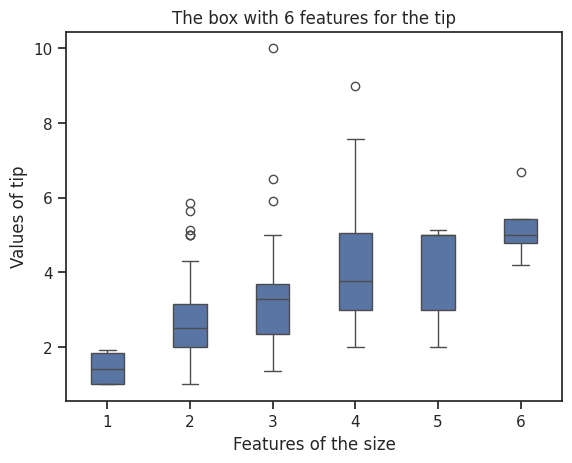

In [70]:
plot_box(data, "size", "tip", 0.4, "Features of the size", "Values of tip", "The box with 6 features for the tip")

### 7

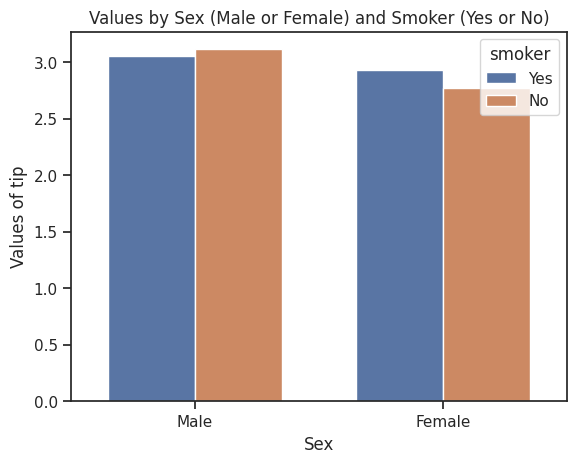

In [65]:
## 风格管理
sns.set_style("ticks")
sns.set_context("notebook")
sns.barplot(data=data, x="sex", y="tip", errorbar=None, width=0.7, 
            hue="smoker").set_title("Values by Sex (Male or Female) and Smoker (Yes or No)")
plt.xlabel("Sex") # 设置横坐标标题
plt.ylabel("Values of tip") # 设置纵坐标标题
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [72]:
import seaborn as sns
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1

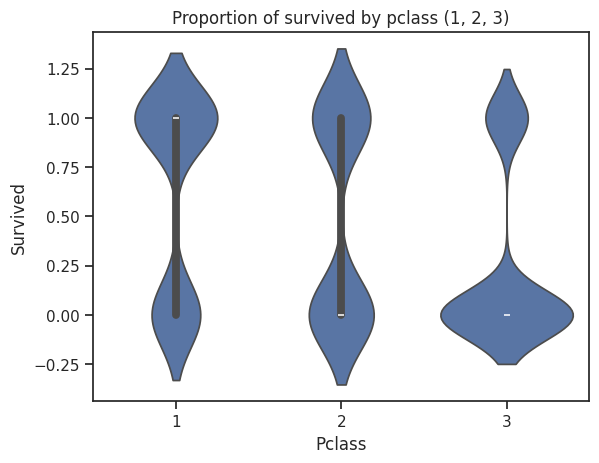

In [73]:
sns.set_style("ticks")
sns.set_context("notebook")
sns.violinplot(x='pclass', y='survived', data=data)
plt.title("Proportion of survived by pclass (1, 2, 3)")
plt.xlabel("Pclass") 
plt.ylabel("Survived")
plt.show()

### 2

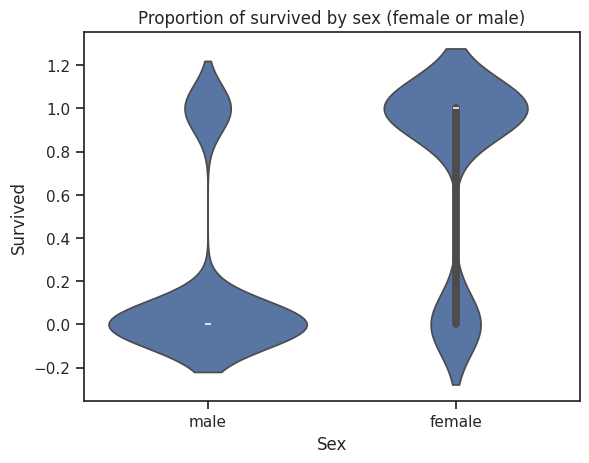

In [74]:
sns.violinplot(x='sex', y='survived', data=data)
plt.title("Proportion of survived by sex (female or male)")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

### 3

/tmp/ipykernel_181/3631180496.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['unsurvived', 'survived']) # 设置横坐标刻度值


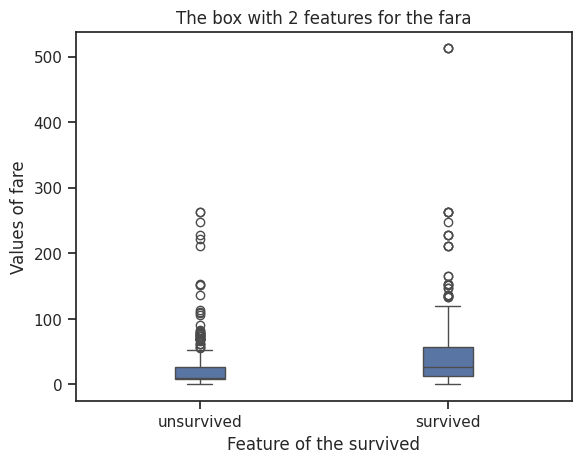

In [75]:
fig, ax = plt.subplots()
sns.boxplot(data=data, x="survived", y="fare", width=0.2).set_title("The box with 2 features for the fara")
plt.xlabel("Feature of the survived") 
plt.ylabel("Values of fare")
ax.set_xticklabels(['unsurvived', 'survived']) 
plt.show()

### 4

/tmp/ipykernel_181/1348142079.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['unsurvived', 'survived']) # 设置横坐标刻度值


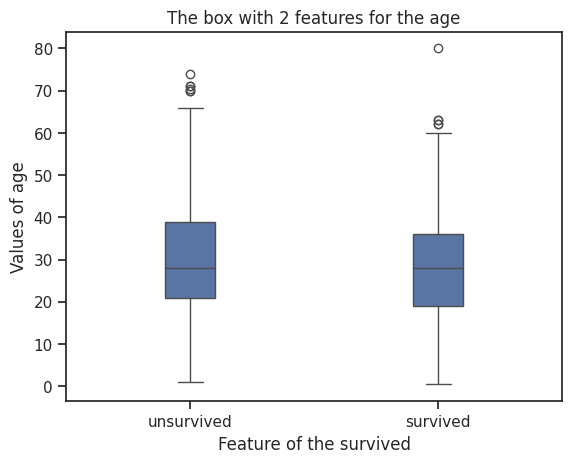

In [76]:
fig, ax = plt.subplots()
sns.boxplot(data=data, x="survived", y="age", width=0.2).set_title("The box with 2 features for the age")
plt.xlabel("Feature of the survived") 
plt.ylabel("Values of age")
ax.set_xticklabels(['unsurvived', 'survived'])
plt.show()

### 5

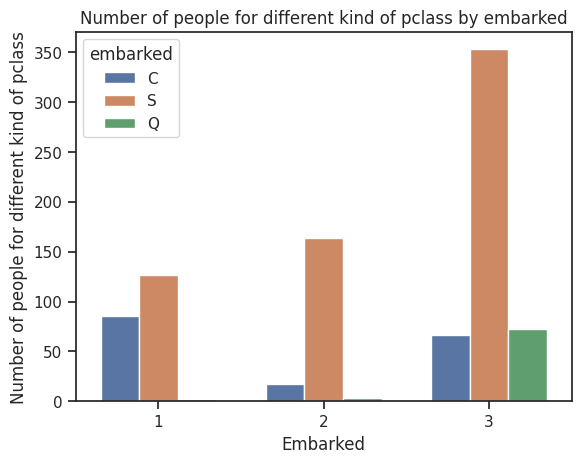

In [77]:
sns.barplot(data=data, x="pclass", y="pclass", hue="embarked", estimator="count", errorbar=None, width=0.7)
plt.title("Number of people for different kind of pclass by embarked")
plt.xlabel("Embarked") 
plt.ylabel("Number of people for different kind of pclass")
plt.show()

### 6

/tmp/ipykernel_181/1895261644.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['unsurvived', 'survived']) # 设置横坐标刻度值


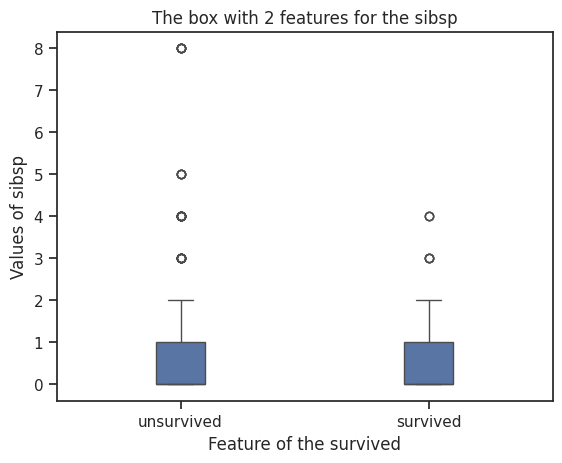

In [78]:
fig, ax = plt.subplots()
sns.boxplot(data=data, x="survived", y="sibsp", width=0.2).set_title("The box with 2 features for the sibsp")
plt.xlabel("Feature of the survived")
plt.ylabel("Values of sibsp")
ax.set_xticklabels(['unsurvived', 'survived'])
plt.show()

### 7

/tmp/ipykernel_181/764310269.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['unsurvived', 'survived']) # 设置横坐标刻度值


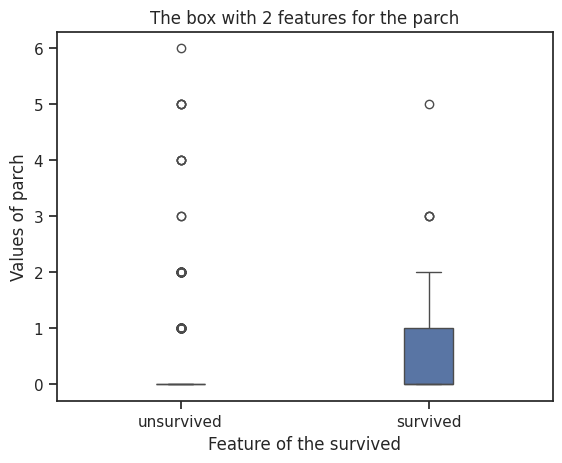

In [79]:
fig, ax = plt.subplots()
sns.boxplot(data=data, x="survived", y="parch", width=0.2).set_title("The box with 2 features for the parch")
plt.xlabel("Feature of the survived") 
plt.ylabel("Values of parch")
ax.set_xticklabels(['unsurvived', 'survived'])
plt.show()

### 8

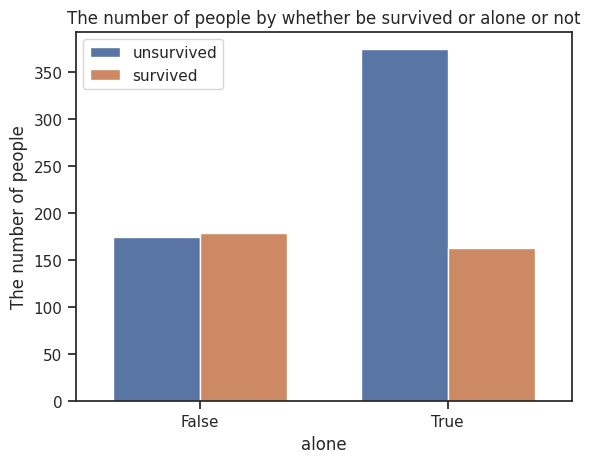

In [80]:
sns.barplot(data=data, x="alone", y="survived",  hue="survived",estimator="count", errorbar=None, width=0.7)
plt.title("The number of people by whether be survived or alone or not")
plt.xlabel("alone") 
plt.ylabel("The number of people") 
plt.legend(labels=["unsurvived", "survived"])
plt.show()